In [1]:
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2
import matplotlib.pyplot as plt


In [2]:
import cv2

img = cv2.imread('test.jpg')

cv2.imshow('Test', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

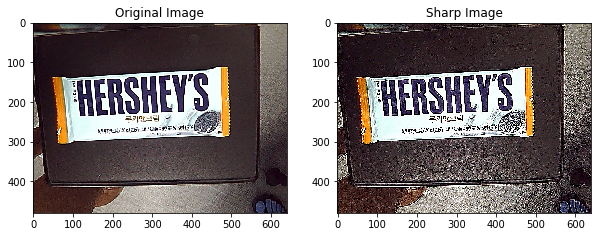

In [1]:

import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2
import matplotlib.pyplot as plt



image = cv2.imread('test.jpg')
cv2.imshow('Test', image)
cv2.waitKey(0)

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])



# # 커널 적용 
image_sharp = cv2.filter2D(image, -1, kernel)
cv2.imshow('sharp_test', image_sharp)




fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp)
ax[1].set_title('Sharp Image')



cv2.waitKey(0)
cv2.destroyAllWindows()


Text(0.5, 1.0, 'Enhanced Image')

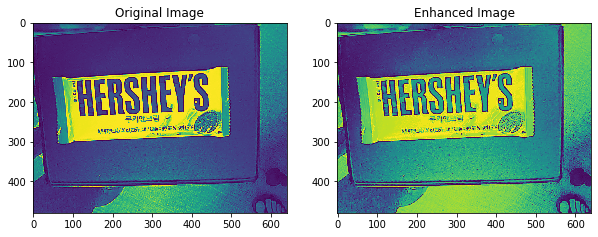

In [24]:
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상
image_enhanced = cv2.equalizeHist(image)

# plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(image_enhanced)
ax[1].set_title('Enhanced Image')

In [5]:
#!/opt/local/bin/python
# -*- coding: utf-8 -*-
import cv2
import numpy as np


#검정색 이미지를 생성 
#h : 높이
#w : 넓이
#d : 깊이 (1 : gray, 3: bgr)
def create_image(h, w, d):
    image = np.zeros((h, w,  d), np.uint8)
    color = tuple(reversed((0,0,0)))
    image[:] = color
    return image



#검정색 이미지를 생성 단 배율로 더 크게
#hcout : 높이 배수(2: 세로로 2배)
#wcount : 넓이 배수 (2: 가로로 2배)
def create_image_multiple(h, w, d, hcout, wcount):
    image = np.zeros((h*hcout, w*wcount,  d), np.uint8)
    color = tuple(reversed((0,0,0)))
    image[:] = color
    return image



#통이미지 하나에 원하는 위치로 복사(표시) 
#dst : create_image_multiple 함수에서 만든 통 이미지
#src : 복사할 이미지
#h : 높이
#w : 넓이
#d : 깊이
#col : 행 위치(0부터 시작)
#row : 열 위치(0부터 시작) 
def showMultiImage(dst, src, h, w, d, col, row):
    
    # 3 color
    if  d==3:
        dst[(col*h):(col*h)+h, (row*w):(row*w)+w] = src[0:h, 0:w]
    # 1 color
    elif d==1:
        dst[(col*h):(col*h)+h, (row*w):(row*w)+w, 0] = src[0:h, 0:w]
        dst[(col*h):(col*h)+h, (row*w):(row*w)+w, 1] = src[0:h, 0:w]
        dst[(col*h):(col*h)+h, (row*w):(row*w)+w, 2] = src[0:h, 0:w]


def showMulti_text(dst, src, h, w, d, col, row):
    
    img = np.zeros((480,640,3),np.uint8)
    b,g,r,a = 255,255,255,0
    
    pred = 0.8
    item_pred = str(pred*100) + " %"
    item_id = 10010
    item_name = "해태_포도봉봉캔340ml"
    item_price = 1200
    item_Qty = 105
    item_Category = "drink" 
    
    fontpath = "./font/NanumGothic.ttf"
    font = ImageFont.truetype(fontpath, 20)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((60, 70),  "Prediction_Prob  :  {}".format(item_pred) , font = font , fill=(b,g,r,a))
    draw.text((60, 140),  "Item_ID :  {}".format(item_id), font = font , fill=(b,g,r,a))
    draw.text((60, 210),  "Item_Name  :   {}".format(item_name), font = font ,  fill=(b,g,r,a))
    draw.text((60, 280),  "Item_Price  :  {}".format(item_price) , font = font  , fill=(b,g,r,a))
    draw.text((60, 350),  "Item_Qty  :  {}".format(item_Qty) , font = font  , fill=(b,g,r,a))
    draw.text((60, 420),  "Item_Category  :  {}".format(item_Category) , font = font  , fill=(b,g,r,a))
    
    img = np.array(img_pil)

    # 3 color
    if  d==3:
        dst[(col*h):(col*h)+h, (row*w):(row*w)+w] = img[0:h, 0:w]
    # 1 color
    elif d==1:
        dst[(col*h):(col*h)+h, (row*w):(row*w)+w, 0] = img[0:h, 0:w]
        dst[(col*h):(col*h)+h, (row*w):(row*w)+w, 1] = img[0:h, 0:w]
        dst[(col*h):(col*h)+h, (row*w):(row*w)+w, 2] = img[0:h, 0:w]

##### 코드 시작 ####




#윈도우 생성 및 사이즈 변경
cv2.namedWindow('multiView')
frame = cv2.imread('test.jpg')

cv2.waitKey(0)
cv2.destroyAllWindows()


# while(True):


#     # 이미지 높이
#     height = frame.shape[0]
#     # 이미지 넓이
#     width = frame.shape[1]
#     # 이미지 색상 크기
#     depth = frame.shape[2]

#     #흑백으로 변경
#     grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     #밝기 평균 분포
#     grayframe = cv2.equalizeHist(grayframe)

#     #median 필터 적용
#     blur = cv2.medianBlur(grayframe,5)

#     ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
#     th2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
#     th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    

#     # 화면에 표시할 이미지 만들기 ( 2 x 2 )
#     dstimage = create_image_multiple(height, width, depth, 2, 2)

#     showMultiImage(dstimage, frame, height, width, depth, 0, 0)
#     showMulti_text(dstimage, th2, height, width, 3, 0, 1)


#     # 화면 표시
#     cv2.imshow('multiView',dstimage)

#     #1ms 동안 키입력 대기 ESC키 눌리면 종료
#     if cv2.waitKey(1) == 27:
#         break;

# #윈도우 종료
# cap.release()
# cv2.destroyWindow('multiView')

In [5]:
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2
import matplotlib.pyplot as plt


img = np.zeros((600,500,3),np.uint8)
b,g,r,a = 255,255,255,0

pred = 0.8
item_pred = str(pred*100) + " %"
item_id = 10010
item_name = "해태_포도봉봉캔340ml"
item_price = 1200
item_Qty = 105
item_Category = "drink" 


fontpath = "./font/NanumGothic.ttf"
font = ImageFont.truetype(fontpath, 20)
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)

draw.text((60, 70),  "Prediction_Prob  :  {}".format(item_pred) , font = font , fill=(b,g,r,a))
draw.text((60, 140),  "Item_ID :  {}".format(item_id), font = font , fill=(b,g,r,a))
draw.text((60, 210),  "Item_Name  :   {}".format(item_name), font = font ,  fill=(b,g,r,a))
draw.text((60, 280),  "Item_Price  :  {}".format(item_price) , font = font  , fill=(b,g,r,a))
draw.text((60, 350),  "Item_Qty  :  {}".format(item_Qty) , font = font  , fill=(b,g,r,a))
draw.text((60, 420),  "Item_Category  :  {}".format(item_Category) , font = font  , fill=(b,g,r,a))

img_text = np.array(img_pil)

img_pic = cv2.imread('test.jpg')


resize_text = cv2.resize(img_text , (600 , 600))
resize_pic =cv2.resize(img_pic , (600 ,600))

#addv = np.vstack([img1 , img2])
addh = np.hstack([resize_pic , resize_text])


cv2.imshow("Test", addh)

# cv2.waitKey(0)
# cv2.imshow('Test', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()